In [2]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#data is located in current folder and named 'NY_data'

df = pd.read_csv('NY_data.csv')
df.head(24)

,Month,Day,Hour,Beam Irradiance (W/m^2),Diffuse Irradiance (W/m^2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m^2),Cell Temperature (C),DC Array Output (W),AC System Output (W),Scaled System Output (W),AC Daily Power Production (Wh),Hourly Power Use (W) No ECU,Hourly Energy Capacity Change,Battery Capacity (Wh)
0,1,1.0,0.0,0.0,0.0,-3.0,4.1,0.08,0.000,-3.000,0.000,0.000,0.00,NaN,-575.00,-575.00,22800.00
1,1,1.0,1.0,0.0,0.0,-3.0,3.9,0.08,0.000,-3.000,0.000,0.000,0.00,NaN,-575.00,-575.00,22225.00
2,1,1.0,2.0,0.0,0.0,-3.0,3.7,0.08,0.000,-3.000,0.000,0.000,0.00,NaN,-575.00,-575.00,21650.00
3,1,1.0,3.0,0.0,0.0,-4.0,3.4,0.08,0.000,-4.000,0.000,0.000,0.00,NaN,-575.00,-575.00,21075.00
4,1,1.0,4.0,0.0,0.0,-4.0,3.2,0.08,0.000,-4.000,0.000,0.000,0.00,NaN,-575.00,-575.00,20500.00
5,1,1.0,5.0,0.0,0.0,-4.0,3.1,0.08,0.000,-4.000,0.000,0.000,0.00,NaN,-575.00,-575.00,19925.00
6,1,1.0,6.0,0.0,0.0,-4.0,3.0,0.08,0.000,-4.000,0.000,0.000,0.00,NaN,-575.00,-575.00,19350.00
7,1,1.0,7.0,0.0,8.0,-3.0,2.9,0.08,7.610,-2.868,3.966,0.000,0.00,NaN,-575.00,-575.00,18775.00
8,1,1.0,8.0,252.0,60.0,-2.0,2.8,0.08,179.342,1.735,163.062,153.321,996.59,NaN,-575.00,421.59,18200.00
9,1,1.0,9.0,231.0,117.0,-1.0,2.8,0.08,264.713,4.575,251.003,238.145,1547.94,NaN,-575.00,972.94,18621.59


In [4]:
date_range = pd.date_range(start='1/1/2021', end='2021-12-31 23:00:00', freq='h')

In [5]:
df.drop(index = [8760, 8761, 8762, 8763], inplace=True)

In [6]:
df.isna().sum()

Month                                   0
Day                                     0
Hour                                    0
Beam Irradiance (W/m^2)                 0
Diffuse Irradiance (W/m^2)              0
Ambient Temperature (C)                 0
Wind Speed (m/s)                        0
Albedo                                  0
Plane of Array Irradiance (W/m^2)       0
Cell Temperature (C)                    0
DC Array Output (W)                     0
AC System Output (W)                    0
Scaled System Output (W)                0
AC Daily Power Production (Wh)       8395
Hourly Power Use (W) No ECU             0
Hourly Energy Capacity Change           0
Battery Capacity (Wh)                   0
dtype: int64

In [7]:
df['Date'] = date_range

In [8]:
df.drop(['Month', 'Day', 'Hour'], axis=1, inplace=True)

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.drop(
    ['Beam Irradiance (W/m^2)', 'Diffuse Irradiance (W/m^2)', 'Wind Speed (m/s)', 'Plane of Array Irradiance (W/m^2)', 'Cell Temperature (C)'],
    axis=1,
    inplace=True
)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ambient Temperature (C)         8760 non-null   float64
 1   Albedo                          8760 non-null   float64
 2   DC Array Output (W)             8760 non-null   float64
 3   AC System Output (W)            8760 non-null   float64
 4   Scaled System Output (W)        8760 non-null   object 
 5   AC Daily Power Production (Wh)  365 non-null    object 
 6   Hourly Power Use (W) No ECU     8760 non-null   object 
 7   Hourly Energy Capacity Change   8760 non-null   object 
 8   Battery Capacity (Wh)           8760 non-null   float64
dtypes: float64(5), object(4)
memory usage: 684.4+ KB


In [12]:
df = df.astype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ambient Temperature (C)         8760 non-null   float64
 1   Albedo                          8760 non-null   float64
 2   DC Array Output (W)             8760 non-null   float64
 3   AC System Output (W)            8760 non-null   float64
 4   Scaled System Output (W)        8760 non-null   float64
 5   AC Daily Power Production (Wh)  365 non-null    float64
 6   Hourly Power Use (W) No ECU     8760 non-null   float64
 7   Hourly Energy Capacity Change   8760 non-null   float64
 8   Battery Capacity (Wh)           8760 non-null   float64
dtypes: float64(9)
memory usage: 684.4 KB


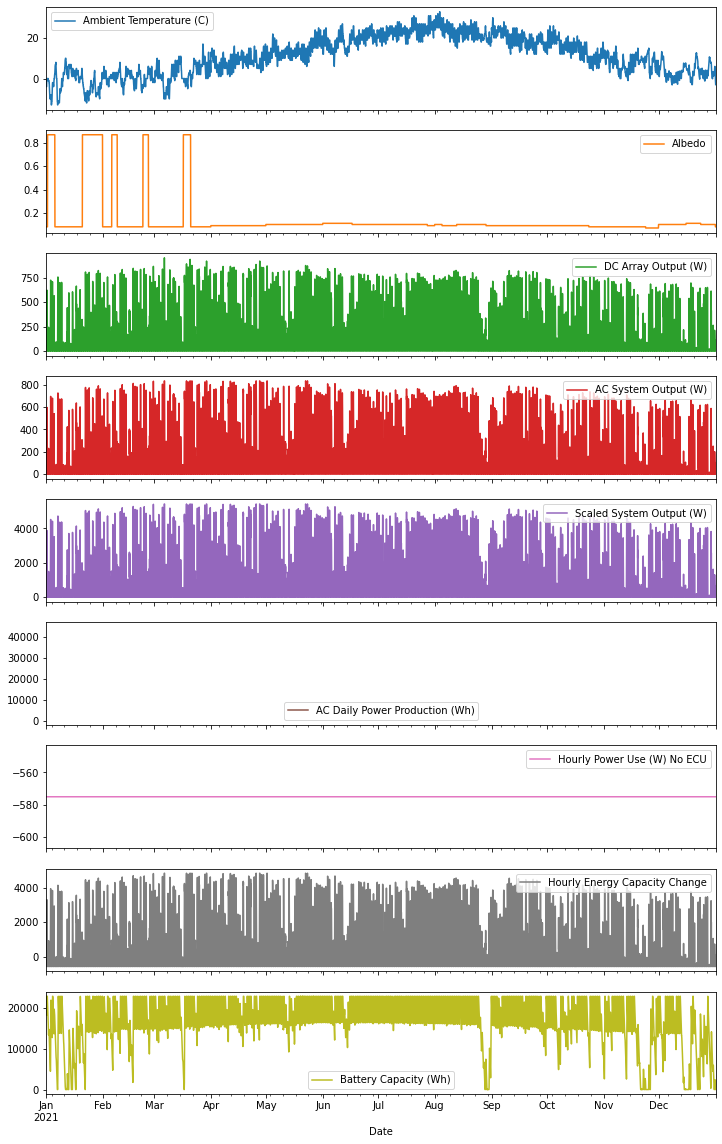

In [14]:
df.plot(subplots=True, figsize = (12, 20));

They want current draw allowed - 

ECU is currently, 2kW draw, between 60-70 deg, no use. Linear as degrees change

gen is on at 25%, cuts at 90%

ideal = 65 degF

create differential of ideal, linear formula from deltaT, power draw increases as abs(delta) increases

1) assume ecu draw at any given point... create loose formula that has 

Mike says 47 deg is the cutoff for heatpump vs electric heat

Find out how many hours in a year are between 65 deg and 47 (or some other value).
Compare that vs hours <47
obtain percentages of this

Find hours in the year that are heat pump hours vs resistive heating hours



In [15]:
df['Ambient Temp (F)'] = df['Ambient Temperature (C)'].apply(lambda x: (x*(9/5)) + 32)

In [16]:
hours_over_70F = (df['Ambient Temp (F)'] >= 70).sum()
hours_under_47F = (df['Ambient Temp (F)'] <= 47).sum()
hours_between = len(df['Ambient Temp (F)']) - hours_over_70F - hours_under_47F
hours_total = len(df['Ambient Temp (F)'])

In [17]:
print('Hours over 70F: ', hours_over_70F)
print('Hours under 47F: ', hours_under_47F)
print('Hours between: ', hours_between)
print('Above summed: ', hours_over_70F+ hours_under_47F+hours_between)
print('Hours total: ', hours_total)

Hours over 70F:  1425
Hours under 47F:  3681
Hours between:  3654
Above summed:  8760
Hours total:  8760


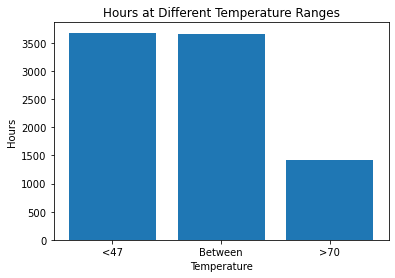

In [18]:
hours = [hours_under_47F, hours_between, hours_over_70F]
plt.bar(x = ["<47",'Between','>70'], height=hours)
plt.xlabel('Temperature')
plt.ylabel('Hours')
plt.title('Hours at Different Temperature Ranges')
plt.show()

In [19]:
#Percentages -

print('Percent under 47: ', (hours_under_47F/hours_total).round(2))
print('Percent between 47 and 70: ', (hours_between/hours_total).round(2))
print('Percent over 65: ', (hours_over_70F/hours_total).round(2))

Percent under 47:  0.42
Percent between 47 and 70:  0.42
Percent over 65:  0.16


## When would the gen be on?

Gen turns on when battery capacity is <=25%, turns off when above 80%

How to model this?

In [20]:
Daily_power = df['AC Daily Power Production (Wh)'].copy().dropna()

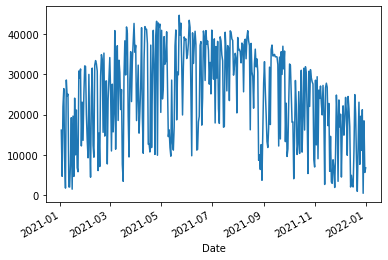

In [21]:
Daily_power.plot();

# With Generator Modeling

In [22]:
#How to model generator with Capacity?

adjusted_df = df[['Battery Capacity (Wh)', 'Scaled System Output (W)', 'Hourly Power Use (W) No ECU']].copy()
adjusted_df = adjusted_df.rename(columns=
                                 {'Battery Capacity (Wh)': 'Base Capacity',
                                  'Scaled System Output (W)': 'Production',
                                  'Hourly Power Use (W) No ECU': 'Consumption'})
# 3 necisary columns = Capacity, Power Production, Power Consumption

# Capacity is base, Production is base or Base+5000 IF Gen is on, Consumption is constant -575

#Steps -
# 1) Create new column, gen_on, that is true or false
# If capacity < capacity.max() * .25: gen_on[i] = True
# elif capacity < capacity.max() * .80 AND gen_on[i-1] = True, gen_on[i] = True
# else: False

# 2) Create new column, adjusted_production
# if gen_on[i] = True, adjusted_production[i] = Power Production[i]+5000
# else: adjusted_production[i] = Power_Production[i]

# 3) Create new column, adjusted_capacity
# adjusted_capacity[0] = 22800
# adjusted_capacity[i] = adjusted_production[i] + Power_Consumption[i]
# if adjusted_production[i] + Power_Consumption[i] > 22800: return 22800
# else: return adjusted_production[i] + Power_Consumption[i]

In [23]:
gen_on = [False]*8760
adjusted_production = [0]*8760
adjusted_capacity = [0]*8760
adjusted_consumption = [-575]*8760

i = 0
while i < 8760:
    if i==0:
        adjusted_capacity[i] = (22800)
        gen_on[i] = False
        adjusted_production[i] = (adjusted_df['Production'][i])
        i+=1
        continue
    
    #Check if previous capacity is <25%
    if adjusted_capacity[i-1] < (22800 * .25):
        #set Gen On to True
        gen_on[i] = True
        
        #Calculate production
        if gen_on[i] == True:
            adjusted_production[i] = (adjusted_df['Production'][i] + 5000)
        else:
            adjusted_production[i] = (adjusted_df['Production'][i])
        
        #Set current capacity and iterate i
        if (adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i]) >= 22800:
            adjusted_capacity[i] = 22800
        else:
            adjusted_capacity[i] = adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i]
        i+=1
    
    #Check if previous capacity < 90% and previous gen_on
    elif adjusted_capacity[i-1] < (22800 * .90) and gen_on[i-1] == True:
        #set Gen On to True
        gen_on[i] = True
        
        #Calculate production
        if gen_on[i] == True:
            adjusted_production[i] = (adjusted_df['Production'][i] + 5000)
        else:
            adjusted_production[i] = (adjusted_df['Production'][i])
        
        #Set current capacity and iterate i
        if (adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i]) >= 22800:
            adjusted_capacity[i] = 22800
        else:
            adjusted_capacity[i] = adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i]
        i+=1
                                       
    else:
        #set Gen On to False
        gen_on[i] = False
        
        #Calculate production
        if gen_on[i] == True:
            adjusted_production[i] = (adjusted_df['Production'][i] + 5000)
        else:
            adjusted_production[i] = (adjusted_df['Production'][i])
        
        #Set current capacity and iterate i
        if adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] > 22800:
            adjusted_capacity[i] = 22800
        else:
            adjusted_capacity[i] = adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i]
        i+=1

In [24]:
no_ecu_df = pd.DataFrame([adjusted_production, adjusted_consumption, gen_on, adjusted_capacity]).T

In [25]:
no_ecu_df.columns = ['adjusted_production', 'adjusted_consumption', 'gen_on', 'adjusted_capacity']

In [26]:
no_ecu_df['Date'] = date_range
no_ecu_df.set_index('Date', inplace=True)

In [27]:
no_ecu_df.head()

,adjusted_production,adjusted_consumption,gen_on,adjusted_capacity
Date,,,,
2021-01-01 00:00:00,0.0,-575,False,22800
2021-01-01 01:00:00,0.0,-575,False,22225.0
2021-01-01 02:00:00,0.0,-575,False,21650.0
2021-01-01 03:00:00,0.0,-575,False,21075.0
2021-01-01 04:00:00,0.0,-575,False,20500.0


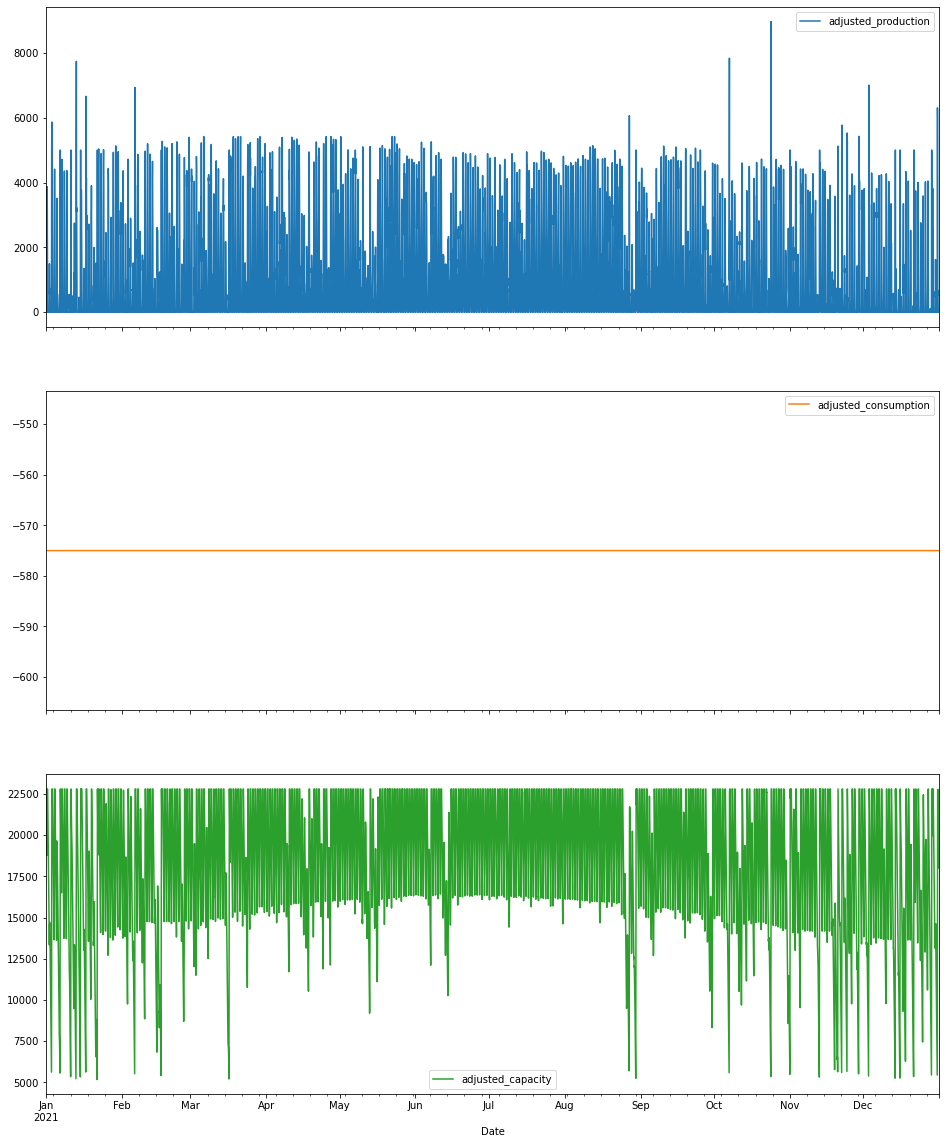

In [28]:
no_ecu_df.plot(subplots=True, figsize = (16, 20));

In [29]:
# Obtain number of hours that the generator is on

no_ecu_df['gen_on'].value_counts()

False    8662
True       98
Name: gen_on, dtype: int64

# Repeat above, with ECU

In [30]:
no_ecu_df['adjusted_capacity'].mean()

18449.693515981857

In [31]:
# Less than 20 degrees, electric heater is maxed at 3000 watts,
# Between 20 and 47, electric heater varies from 100 to 3000 watts
# Between 47 and 70, heat exchanger varies from 0 to 2100
# Between 70 and 93, AC varies from 0 to 2100
# Above 93, AC is maxed at 2100 Watts

def temp_to_watts(temp):
    if temp >=47 and temp <= 93:
        return 2100 * ((temp - 70) / (47 - 70)) if temp <= 70 else 2100 * ((temp - 70) / (93 - 70))
    elif temp > 93:
        return 2100
    elif temp < 47:
        return 2100

In [32]:
temp_to_watts(53)

1552.1739130434783

In [33]:
ecu_df = no_ecu_df.copy()

In [34]:
ecu_df['Temp'] = df['Ambient Temp (F)']

In [35]:
ecu_df['ECU Consumption'] = ecu_df['Temp'].apply(temp_to_watts)
ecu_df['ECU Consumption'] = ecu_df['ECU Consumption'].apply(lambda x: x*-1).round(2)

In [36]:
ecu_df.head()

,adjusted_production,adjusted_consumption,gen_on,adjusted_capacity,Temp,ECU Consumption
Date,,,,,,
2021-01-01 00:00:00,0.0,-575,False,22800,26.6,-2100.0
2021-01-01 01:00:00,0.0,-575,False,22225.0,26.6,-2100.0
2021-01-01 02:00:00,0.0,-575,False,21650.0,26.6,-2100.0
2021-01-01 03:00:00,0.0,-575,False,21075.0,24.8,-2100.0
2021-01-01 04:00:00,0.0,-575,False,20500.0,24.8,-2100.0


In [37]:
gen_on = [False]*8760
adjusted_production = [0]*8760
adjusted_capacity = [0]*8760
adjusted_consumption = [-575]*8760
temp = ecu_df['Temp'].tolist()
ecu_consumption = ecu_df['ECU Consumption'].tolist()

i = 0
while i < 8760:
    if i==0:
        adjusted_capacity[i] = (22800)
        gen_on[i] = False
        adjusted_production[i] = (adjusted_df['Production'][i])
        i+=1
        continue
    
    #Check if previous capacity is <25%
    if adjusted_capacity[i-1] < (22800 * .25):
        #set Gen On to True
        gen_on[i] = True
        
        #Calculate production
        if gen_on[i] == True:
            adjusted_production[i] = (adjusted_df['Production'][i] + 5000)
        else:
            adjusted_production[i] = (adjusted_df['Production'][i])
        
        #Set current capacity and iterate i
        if (adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]) >= 22800:
            adjusted_capacity[i] = 22800
        else:
            adjusted_capacity[i] = adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]
        i+=1
    
    #Check if previous capacity < 80% and previous gen_on
    elif adjusted_capacity[i-1] < (22800 * .90) and gen_on[i-1] == True:
        #set Gen On to True
        gen_on[i] = True
        
        #Calculate production
        if gen_on[i] == True:
            adjusted_production[i] = (adjusted_df['Production'][i] + 5000)
        else:
            adjusted_production[i] = (adjusted_df['Production'][i])
        
        #Set current capacity and iterate i
        if (adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]) >= 22800:
            adjusted_capacity[i] = 22800
        else:
            adjusted_capacity[i] = adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]
        i+=1
                                       
    else:
        #set Gen On to False
        gen_on[i] = False
        
        #Calculate production
        if gen_on[i] == True:
            adjusted_production[i] = (adjusted_df['Production'][i] + 5000)
        else:
            adjusted_production[i] = (adjusted_df['Production'][i])
        
        #Set current capacity and iterate i
        if adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]> 22800:
            adjusted_capacity[i] = 22800
        else:
            adjusted_capacity[i] = adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]
        i+=1

In [38]:
ecu_df = pd.DataFrame([adjusted_production, adjusted_consumption, gen_on, adjusted_capacity, temp, ecu_consumption]).T

In [39]:
ecu_df.columns = ['adjusted_production', 'adjusted_consumption', 'gen_on', 'adjusted_capacity', 'Temp', 'ECU Consumption']
ecu_df['Date'] = date_range
ecu_df.set_index('Date', inplace=True)
ecu_df.head()

,adjusted_production,adjusted_consumption,gen_on,adjusted_capacity,Temp,ECU Consumption
Date,,,,,,
2021-01-01 00:00:00,0.0,-575,False,22800,26.6,-2100.0
2021-01-01 01:00:00,0.0,-575,False,20125.0,26.6,-2100.0
2021-01-01 02:00:00,0.0,-575,False,17450.0,26.6,-2100.0
2021-01-01 03:00:00,0.0,-575,False,14775.0,24.8,-2100.0
2021-01-01 04:00:00,0.0,-575,False,12100.0,24.8,-2100.0


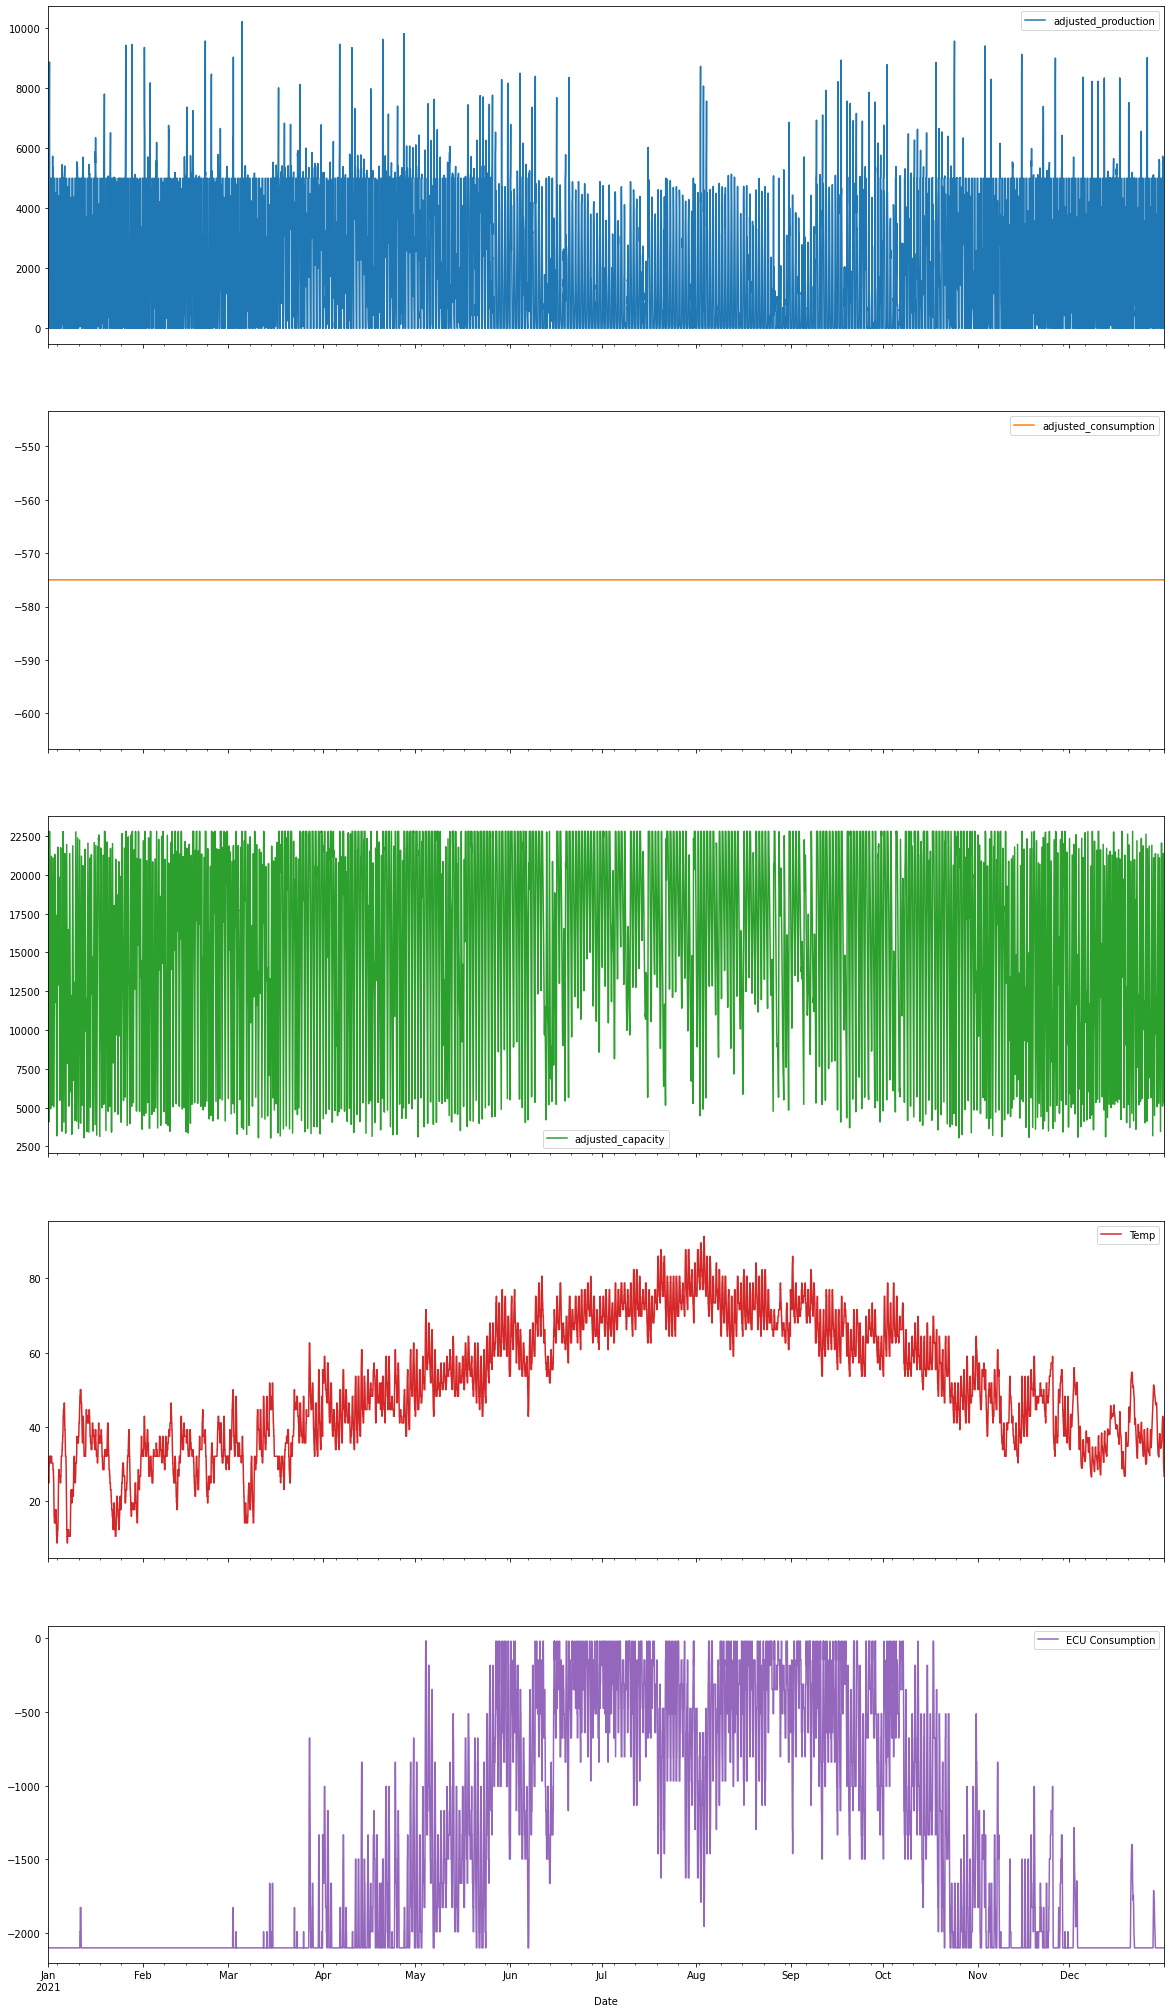

In [40]:
ecu_df.plot(subplots=True, figsize = (20, 36));

In [41]:
ecu_df['gen_on'].value_counts()

False    6638
True     2122
Name: gen_on, dtype: int64

In [42]:
hours_gen_is_on = ecu_df['gen_on'].value_counts()[1]
hours_gen_is_on

2122

In [43]:
print('Percent of time generator is on: ', (hours_gen_is_on/len(ecu_df['gen_on'])*100).round(2))

Percent of time generator is on:  24.22


In [44]:
fuel_consumed_1Hr = (3.43/6)
fuel_consumed_1Yr = fuel_consumed_1Hr * hours_gen_is_on
print(fuel_consumed_1Yr.round(2))

1213.08


In [45]:
fuel_consumed_1Hr

0.5716666666666667

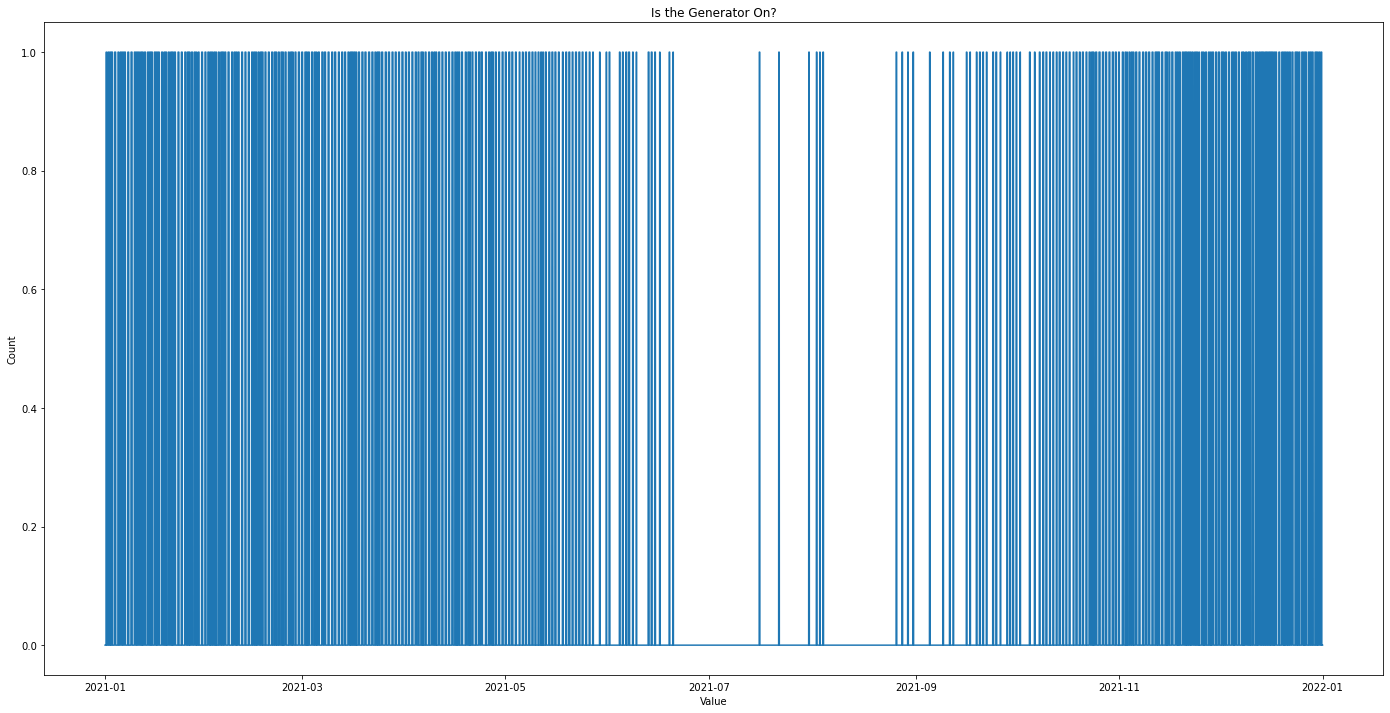

In [46]:
is_gen_on = ecu_df['gen_on'].tolist()

fig = plt.figure(figsize=(24, 12))
plt.plot(date_range, is_gen_on)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Is the Generator On?')

# Show the plot
plt.show()

In [47]:
monthly_sums = ecu_df.resample('M')['gen_on'].sum()

In [48]:
Hours_Gen_on_monthly = monthly_sums.to_dict()

In [49]:
Hours_Gen_on_monthly

{Timestamp('2021-01-31 00:00:00', freq='M'): 292,
 Timestamp('2021-02-28 00:00:00', freq='M'): 248,
 Timestamp('2021-03-31 00:00:00', freq='M'): 256,
 Timestamp('2021-04-30 00:00:00', freq='M'): 234,
 Timestamp('2021-05-31 00:00:00', freq='M'): 178,
 Timestamp('2021-06-30 00:00:00', freq='M'): 61,
 Timestamp('2021-07-31 00:00:00', freq='M'): 12,
 Timestamp('2021-08-31 00:00:00', freq='M'): 27,
 Timestamp('2021-09-30 00:00:00', freq='M'): 65,
 Timestamp('2021-10-31 00:00:00', freq='M'): 179,
 Timestamp('2021-11-30 00:00:00', freq='M'): 263,
 Timestamp('2021-12-31 00:00:00', freq='M'): 307}

In [50]:
keys = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
values = list(Hours_Gen_on_monthly.values())

In [51]:
Hours_Gen_on_monthly = {keys[i]: values[i] for i in range(len(keys))}

In [52]:
Hours_Gen_on_monthly

{'January': 292,
 'February': 248,
 'March': 256,
 'April': 234,
 'May': 178,
 'June': 61,
 'July': 12,
 'August': 27,
 'September': 65,
 'October': 179,
 'November': 263,
 'December': 307}

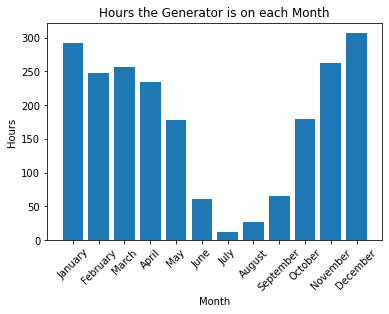

In [53]:
names = list(Hours_Gen_on_monthly.keys())
values = list(Hours_Gen_on_monthly.values())

plt.bar(range(len(Hours_Gen_on_monthly)), values, tick_label=names)
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Hours')
plt.title('Hours the Generator is on each Month')
plt.show()

In [54]:
ecu_df.head()

,adjusted_production,adjusted_consumption,gen_on,adjusted_capacity,Temp,ECU Consumption
Date,,,,,,
2021-01-01 00:00:00,0.0,-575,False,22800,26.6,-2100.0
2021-01-01 01:00:00,0.0,-575,False,20125.0,26.6,-2100.0
2021-01-01 02:00:00,0.0,-575,False,17450.0,26.6,-2100.0
2021-01-01 03:00:00,0.0,-575,False,14775.0,24.8,-2100.0
2021-01-01 04:00:00,0.0,-575,False,12100.0,24.8,-2100.0


In [55]:
if ecu_df['Temp'][0] <= 30 or ecu_df['gen_on'][0]:
    print(ecu_df['Temp'][0])

26.6


In [56]:
temp_min = ecu_df['Temp'].min()
temp_max = ecu_df['Temp'].max()

gen_on_in_temp_range = {
    '0 to 10': 0,
    '11 to 20': 0,
    '21 to 30': 0,
    '31 to 40': 0,
    '41 to 50': 0,
    '51 to 60': 0,
    '61 to 70': 0,
    '71 to 80': 0,
    '81 to 90': 0,
    '91 to 100': 0
}

i=0
while i < len(ecu_df):
    if ecu_df['Temp'][i] <= 10 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['0 to 10'] +=1
    elif ecu_df['Temp'][i] <= 20 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['11 to 20'] +=1
    elif ecu_df['Temp'][i] <= 30 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['21 to 30'] +=1
    elif ecu_df['Temp'][i] <= 40 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['31 to 40'] +=1
    elif ecu_df['Temp'][i] <= 50 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['41 to 50'] +=1
    elif ecu_df['Temp'][i] <= 60 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['51 to 60'] +=1
    elif ecu_df['Temp'][i] <= 70 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['61 to 70'] +=1
    elif ecu_df['Temp'][i] <= 80 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['71 to 80'] +=1
    elif ecu_df['Temp'][i] <= 90 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['81 to 90'] +=1
    elif ecu_df['Temp'][i] <= 100 and ecu_df['gen_on'][i]:
        gen_on_in_temp_range['91 to 100'] +=1
    i+=1

In [57]:
gen_on_in_temp_range

{'0 to 10': 3,
 '11 to 20': 97,
 '21 to 30': 202,
 '31 to 40': 748,
 '41 to 50': 691,
 '51 to 60': 261,
 '61 to 70': 92,
 '71 to 80': 19,
 '81 to 90': 9,
 '91 to 100': 0}

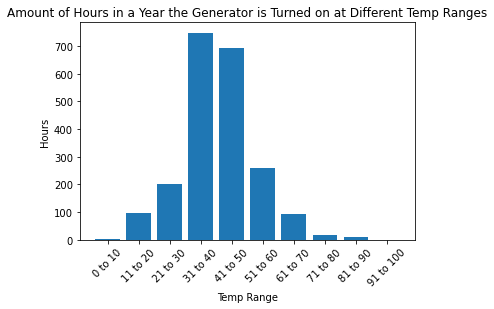

In [58]:
names = list(gen_on_in_temp_range.keys())
values = list(gen_on_in_temp_range.values())

plt.bar(range(len(gen_on_in_temp_range)), values, tick_label=names)
plt.xticks(rotation = 45)
plt.title('Amount of Hours in a Year the Generator is Turned on at Different Temp Ranges')
plt.xlabel('Temp Range')
plt.ylabel('Hours')
plt.show()

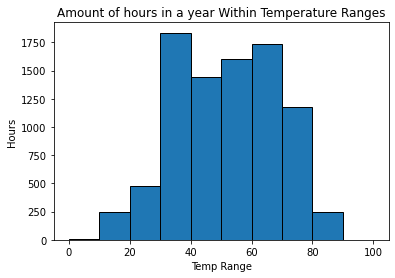

In [59]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(ecu_df['Temp'], bins= bins, edgecolor='k')
plt.title('Amount of hours in a year Within Temperature Ranges');
plt.xlabel('Temp Range')
plt.ylabel('Hours');

# Watt consumption of ECU vs Generator Runtime

Sweep values of ECU consumption from 2100 to 4100 in 200 watt intervals.

Steps-
* 1) Turn my df creation cell into a function so I can repeat it over and over again
* 2) Change my ECU watt consumption function to include a maximum value for temp to watts ranging from 2100 to 4100
* 3) Plot The ECU watt consumption vs total Generator hours on over the course of the year (Possibly as a percentage) to determine what value we think is ideal for our ECU to be at. Obtain Amps from there using P=IV => I=P/V where V = 208 Volts.



In [60]:
def temperature_to_watts(temp, max_watts):
    if temp >=47 and temp <= 93:
        return max_watts * ((temp - 70) / (47 - 70)) if temp <= 70 else max_watts * ((temp - 70) / (93 - 70))
    elif temp > 93:
        return max_watts
    elif temp < 47:
        return max_watts

def ecu_consumption_df_creation(max_watts):
    # Creates a DataFrame with a temperature column and ECU Consumption column
    # Returns the DataFrame
    temp_series = ecu_df['Temp'].copy()
    consumption_series = temp_series.apply(lambda x: temperature_to_watts(x, max_watts))
    consumption_series = consumption_series.apply(lambda x: x*-1).round(2)
    temp_df = pd.DataFrame()
    temp_df['Temp'] = temp_series
    temp_df['ECU Consumption'] = consumption_series
    return temp_df

def df_creation(ecu_consumption_df):
    gen_on = [False]*8760
    adjusted_production = [0]*8760
    adjusted_capacity = [0]*8760
    adjusted_consumption = [-575]*8760
    temp = ecu_consumption_df['Temp'].tolist()
    ecu_consumption = ecu_consumption_df['ECU Consumption'].tolist()

    i = 0
    while i < 8760:
        if i==0:
            adjusted_capacity[i] = (22800)
            gen_on[i] = False
            adjusted_production[i] = (adjusted_df['Production'][i])
            i+=1
            continue
    
        #Check if previous capacity is <25%
        if adjusted_capacity[i-1] < (22800 * .25):
            #set Gen On to True
            gen_on[i] = True
        
            #Calculate production
            if gen_on[i] == True:
                adjusted_production[i] = (adjusted_df['Production'][i] + 5000)
            else:
                adjusted_production[i] = (adjusted_df['Production'][i])
        
            #Set current capacity and iterate i
            if (adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]) >= 22800:
                adjusted_capacity[i] = 22800
            else:
                adjusted_capacity[i] = adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]
            i+=1
    
        #Check if previous capacity < 80% and previous gen_on
        elif adjusted_capacity[i-1] < (22800 * .90) and gen_on[i-1] == True:
            #set Gen On to True
            gen_on[i] = True
        
            #Calculate production
            if gen_on[i] == True:
                adjusted_production[i] = (adjusted_df['Production'][i] + 5000)
            else:
                adjusted_production[i] = (adjusted_df['Production'][i])
        
            #Set current capacity and iterate i
            if (adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]) >= 22800:
                adjusted_capacity[i] = 22800
            else:
                adjusted_capacity[i] = adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]
            i+=1
                                       
        else:
            #set Gen On to False
            gen_on[i] = False
        
            #Calculate production
            if gen_on[i] == True:
                adjusted_production[i] = (adjusted_df['Production'][i] + 5000)
            else:
                adjusted_production[i] = (adjusted_df['Production'][i])
        
            #Set current capacity and iterate i
            if adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]> 22800:
                adjusted_capacity[i] = 22800
            else:
                adjusted_capacity[i] = adjusted_capacity[i-1] + adjusted_production[i] + adjusted_consumption[i] + ecu_consumption[i]
            i+=1
   
    temporary_df = pd.DataFrame([adjusted_production, adjusted_consumption, gen_on, adjusted_capacity, temp, ecu_consumption]).T
    temporary_df.columns = ['Production', 'Consumption', 'gen_on', 'Capacity', 'Temp', 'ECU Consumption']
    date_range = pd.date_range(start='1/1/2021', end='2021-12-31 23:00:00', freq='h')
    temporary_df['Date'] = date_range
    temporary_df.set_index('Date', inplace=True)
    return temporary_df

In [61]:
watt_values = np.linspace(2100, 4100, (4100-2100)//200 +1)

In [62]:
watt_values

array([2100., 2300., 2500., 2700., 2900., 3100., 3300., 3500., 3700.,
       3900., 4100.])

In [63]:
list_of_dfs = []
for value in watt_values:
    holder_df = ecu_consumption_df_creation(value)
    holder_df = df_creation(holder_df)
    list_of_dfs.append(holder_df)

In [64]:
list_of_gen_on_values = []
for df in list_of_dfs:
    list_of_gen_on_values.append(df.gen_on.value_counts()[1])

In [65]:
list_of_gen_on_values

[2122, 2315, 2540, 2737, 2974, 3207, 3424, 3645, 3851, 4086, 4303]

In [66]:
list_of_gen_on_values_as_percent = np.array(list_of_gen_on_values)
list_of_gen_on_values_as_percent = (list_of_gen_on_values_as_percent/8760)*100

In [67]:
list_of_gen_on_values_as_percent.round(2)

array([24.22, 26.43, 29.  , 31.24, 33.95, 36.61, 39.09, 41.61, 43.96,
       46.64, 49.12])

In [68]:
delta_temp_minus_hours_on = watt_values - np.array(list_of_gen_on_values)

In [69]:
delta_temp_minus_hours_on

array([ -22.,  -15.,  -40.,  -37.,  -74., -107., -124., -145., -151.,
       -186., -203.])

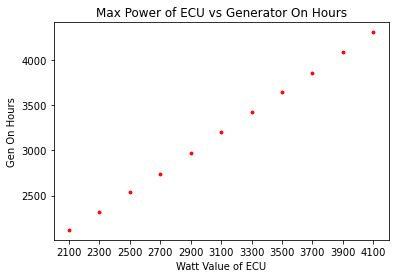

In [70]:
plt.scatter(watt_values, list_of_gen_on_values, color='r', s=8)
plt.title('Max Power of ECU vs Generator On Hours');
plt.xlabel('Watt Value of ECU')
plt.ylabel('Gen On Hours')
plt.xticks(watt_values);

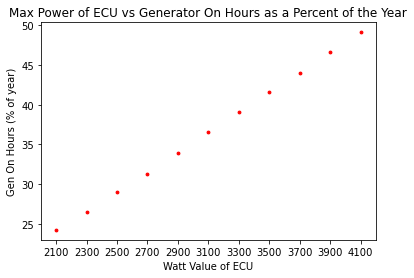

In [71]:
plt.scatter(watt_values, list_of_gen_on_values_as_percent, color='r', s=8)
plt.title('Max Power of ECU vs Generator On Hours as a Percent of the Year');
plt.xlabel('Watt Value of ECU')
plt.ylabel('Gen On Hours (% of year)')
plt.xticks(watt_values);

In [72]:
amps_availble = watt_values/208
amps_availble

array([10.09615385, 11.05769231, 12.01923077, 12.98076923, 13.94230769,
       14.90384615, 15.86538462, 16.82692308, 17.78846154, 18.75      ,
       19.71153846])

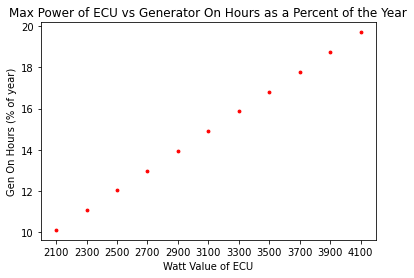

In [73]:
plt.scatter(watt_values, amps_availble, color='r', s=8)
plt.title('Max Power of ECU vs Generator On Hours as a Percent of the Year');
plt.xlabel('Watt Value of ECU')
plt.ylabel('Gen On Hours (% of year)')
plt.xticks(watt_values);

In [74]:
yearly_fuel_consumption = fuel_consumed_1Hr*np.array(list_of_gen_on_values)
for val in yearly_fuel_consumption:
    print(str(val.round(2)) + ' gallons')

1213.08 gallons
1323.41 gallons
1452.03 gallons
1564.65 gallons
1700.14 gallons
1833.34 gallons
1957.39 gallons
2083.72 gallons
2201.49 gallons
2335.83 gallons
2459.88 gallons


In [75]:
ecu_gen_conclusions = pd.DataFrame([watt_values, 
                                  np.array(list_of_gen_on_values), 
                                  list_of_gen_on_values_as_percent,
                                  amps_availble, 
                                  yearly_fuel_consumption]).T
ecu_gen_conclusions.columns = ['Watt Values', 'Hours Gen is on (yrly)', 'Percent of Year Gen is on', 'Amps of ECU','Yearly Fuel Consumption']
ecu_gen_conclusions.set_index('Watt Values', inplace=True)

In [76]:
ecu_gen_conclusions.drop('Amps of ECU', axis=1)

,Hours Gen is on (yrly),Percent of Year Gen is on,Yearly Fuel Consumption
Watt Values,,,
2100.0,2122.0,24.223744,1213.076667
2300.0,2315.0,26.426941,1323.408333
2500.0,2540.0,28.995434,1452.033333
2700.0,2737.0,31.244292,1564.651667
2900.0,2974.0,33.949772,1700.136667
3100.0,3207.0,36.609589,1833.335000
3300.0,3424.0,39.086758,1957.386667
3500.0,3645.0,41.609589,2083.725000
3700.0,3851.0,43.961187,2201.488333


# Generating Amps available to ECU

* Worst day = Lowest daily sum or AC Produced. Gen will be on. Subtract work station power, remaining power is for ECU
* Best case = Highest production, no gen, subtract work stations, remaining power is for ECU

#### They want amps vs temp
* Worst day is coldest
* Best day is hottest

Use proportions of generator yearly on time to limit Amps availble within temperature ranges

In [77]:
no_ecu_gen_on_in_temp_range = {
    '0 to 10': 0,
    '11 to 20': 0,
    '21 to 30': 0,
    '31 to 40': 0,
    '41 to 50': 0,
    '51 to 60': 0,
    '61 to 70': 0,
    '71 to 80': 0,
    '81 to 90': 0,
    '91 to 100': 0
}

i=0
while i < len(no_ecu_df):
    if ecu_df['Temp'][i] <= 10 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['0 to 10'] +=1
    elif ecu_df['Temp'][i] <= 20 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['11 to 20'] +=1
    elif ecu_df['Temp'][i] <= 30 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['21 to 30'] +=1
    elif ecu_df['Temp'][i] <= 40 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['31 to 40'] +=1
    elif ecu_df['Temp'][i] <= 50 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['41 to 50'] +=1
    elif ecu_df['Temp'][i] <= 60 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['51 to 60'] +=1
    elif ecu_df['Temp'][i] <= 70 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['61 to 70'] +=1
    elif ecu_df['Temp'][i] <= 80 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['71 to 80'] +=1
    elif ecu_df['Temp'][i] <= 90 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['81 to 90'] +=1
    elif ecu_df['Temp'][i] <= 100 and no_ecu_df['gen_on'][i]:
        no_ecu_gen_on_in_temp_range['91 to 100'] +=1
    i+=1

In [78]:
no_ecu_gen_on_in_temp_range

{'0 to 10': 0,
 '11 to 20': 8,
 '21 to 30': 0,
 '31 to 40': 41,
 '41 to 50': 29,
 '51 to 60': 10,
 '61 to 70': 10,
 '71 to 80': 0,
 '81 to 90': 0,
 '91 to 100': 0}

In [79]:
no_ecu_df['gen_on'].value_counts()

False    8662
True       98
Name: gen_on, dtype: int64

In [80]:
no_ecu_gen_on_percents = np.array(list(no_ecu_gen_on_in_temp_range.values()))
no_ecu_gen_on_percents = no_ecu_gen_on_percents/98

In [81]:
no_ecu_gen_on_percents

array([0.        , 0.08163265, 0.        , 0.41836735, 0.29591837,
       0.10204082, 0.10204082, 0.        , 0.        , 0.        ])

In [82]:
temperature_only_df = ecu_df['Temp'].apply(lambda x: np.round(x, 0))

Group data to obtain average Wh produced at each rounded temperature, subtract 575 W x 24 hr (5 workstations for 24 hours) then add 5000 W x 24 hr x percentage of time gen is on during that temp range to obtain leftover watts

In [84]:
def temperature_function(temp):
    x = [9, 91]
    y = [.24, .10]
    return 5000 * 24 * np.interp(temp, x, y)

In [85]:
temp_vs_amps_df = pd.DataFrame([temperature_only_df, no_ecu_df['adjusted_production']]).T
amps_mean = temp_vs_amps_df.groupby('Temp').mean()
workstations = -575*24
amps_mean = (amps_mean + workstations)
amps_mean = amps_mean.reset_index()
amps_mean

,Temp,adjusted_production
0,9.0,-13413.784000
1,10.0,-13515.877778
2,12.0,-12863.387692
3,14.0,-13061.770750
4,16.0,-12911.247838
...,...,...
56,84.0,-10735.163947
57,86.0,-10404.355769
58,88.0,-9924.878571
59,90.0,-9718.071111


In [86]:
for x in amps_mean.index:
    amps_mean['adjusted_production'][x] = amps_mean['adjusted_production'][x] + temperature_function(amps_mean['Temp'][x])

In [87]:
amps_mean

,Temp,adjusted_production
0,9.0,15386.216000
1,10.0,15079.244173
2,12.0,15321.978161
3,14.0,14713.839006
4,16.0,14454.605821
...,...,...
56,84.0,2698.982394
57,86.0,2620.034475
58,88.0,2689.755575
59,90.0,2486.806938


In [88]:
amps_mean['Amps'] = amps_mean['adjusted_production'].apply(lambda x: x/208)

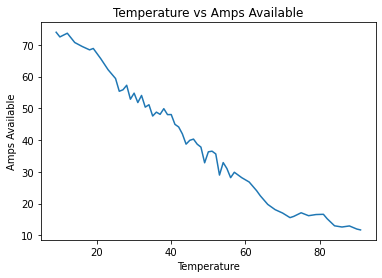

In [89]:
plt.plot(amps_mean['Temp'], amps_mean['Amps'])
plt.xlabel('Temperature')
plt.ylabel('Amps Available')
plt.title('Temperature vs Amps Available');

In [163]:
#Create a quadtratic mapping function, 
# low temp = high volts available
# Mid temp = low volts available
# High temp = Medium volts available

def temp_to_current(temp):
    if temp <= 9:
        return 21
    elif temp <= 30:
        return np.interp(temp, [9, 30], [21, 10])
    elif temp <= 60:
        return 10
    elif temp <= 93:
        return np.interp(temp, [60, 93], [10, 16])
    
xxddxxdd = amps_mean['Temp'].apply(temp_to_current)
xxddxxdd = pd.DataFrame([xxddxxdd, amps_mean['Temp']])
xxddxxdd = xxddxxdd.T
xxddxxdd.columns = ['Amps', 'Temp']
xxddxxdd.set_index('Temp', inplace=True)

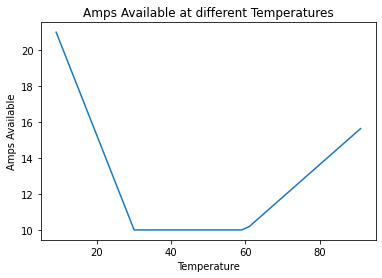

In [164]:
plt.title('Amps Available at different Temperatures');
plt.xlabel('Temperature')
plt.ylabel('Amps Available')
plt.plot(xxddxxdd);

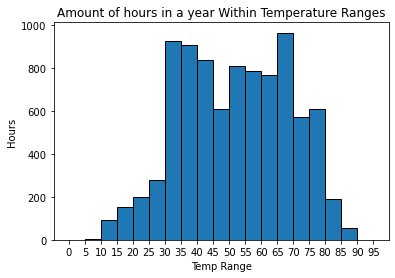

In [158]:
bins = list(range(0, 100, 5))
plt.hist(ecu_df['Temp'], bins= bins, edgecolor='k')
plt.title('Amount of hours in a year Within Temperature Ranges');
plt.xlabel('Temp Range')
plt.xticks(bins)
plt.ylabel('Hours');